In [1]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client import client

credentials = client._get_application_default_credential_from_file('crowd-power-192c6ece53ed.json')
credentials = credentials.create_scoped('https://www.googleapis.com/auth/bigquery')
bigquery_service = build('bigquery', 'v2', credentials=credentials)

In [2]:
query_request = bigquery_service.jobs()
query_data = {
    'query': (
        '''
SELECT
  requesterId,
  MIN(firstSeen) AS firstSeen,
  MAX(lastSeen) AS lastSeen,
  STRING(YEAR(MIN(firstSeen))) + '-' + RIGHT('0' + STRING(MONTH(MIN(firstSeen))), 2) AS M_firstSeen,
  STRING(YEAR(MAX(lastSeen))) + '-' +   RIGHT('0' + STRING(MONTH(MAX(lastSeen))), 2)  AS M_lastSeen,
  COUNT(groupId) AS HITgroupsPosted
FROM
  entities.HITgroup
GROUP BY
  requesterId        
        ''')
}

query_response = query_request.query(
            projectId='crowd-power',
            body=query_data).execute()
        


In [7]:
import pandas as pd

columns = [f.get('name') for f in query_response['schema']['fields']]
rows = [tuple([row['f'][i]['v'] for i in range(len(row['f']))]) for row in query_response['rows']]
df = pd.DataFrame(data=rows, columns=columns, dtype=float)

df['lastSeen'] = pd.to_datetime(df['lastSeen'], unit='s')
df['firstSeen'] = pd.to_datetime(df['firstSeen'], unit='s')

df

,requesterId,firstSeen,lastSeen,M_firstSeen,M_lastSeen,HITgroupsPosted
0,A2NJLV8SU8R7TK,2016-02-26 19:52:03,2016-02-27 02:08:15,2016-02,2016-02,5
1,A3MI6MIUNWCR7F,2014-05-01 16:58:38,2016-02-27 23:59:02,2014-05,2016-02,219795
2,A3BBFC9S8LP2S7,2016-02-27 20:26:01,2016-02-27 21:33:05,2016-02,2016-02,1
3,AZ2OS085REX6O,2016-02-06 02:22:15,2016-02-27 02:38:18,2016-02,2016-02,15
4,A21C7HHM1RNKOR,2014-05-01 17:33:44,2016-02-27 23:06:30,2014-05,2016-02,4196
5,A1IMEJ5GM2YJB7,2015-07-01 15:27:49,2016-02-27 23:33:15,2015-07,2016-02,2
6,A1ZEEGMU3YMZ6,2014-05-07 19:57:21,2016-02-27 23:37:40,2014-05,2016-02,140
7,A3JJOEROKHMQ4A,2014-11-02 19:34:56,2016-02-27 17:37:18,2014-11,2016-02,27
8,A2Z5V9MZJNUE7Q,2016-02-25 07:23:01,2016-02-27 16:23:04,2016-02,2016-02,4
9,ARVLOMB0U2P7L,2016-02-27 03:42:00,2016-02-27 05:58:03,2016-02,2016-02,1


(array([ 0.09824169,  0.16149764,  0.21662996,  0.26158068,  0.30237932,
         0.35256526,  0.40018775,  0.42744702,  0.47138679,  0.54558255,
         0.5950825 ,  0.63526736,  0.67014478,  0.70216991,  0.73943026,
         0.77268296,  0.81395097,  0.86724194,  0.90804058,  0.94497599,  1.        ]),
 array([ 735354.68425926,  735386.45997575,  735418.23569224,
         735450.01140873,  735481.78712522,  735513.56284171,
         735545.3385582 ,  735577.11427469,  735608.88999118,
         735640.66570767,  735672.44142416,  735704.21714065,
         735735.99285714,  735767.76857363,  735799.54429012,
         735831.32000661,  735863.0957231 ,  735894.87143959,
         735926.64715608,  735958.42287257,  735990.19858907,
         736021.97430556]),
 <a list of 21 Patch objects>)

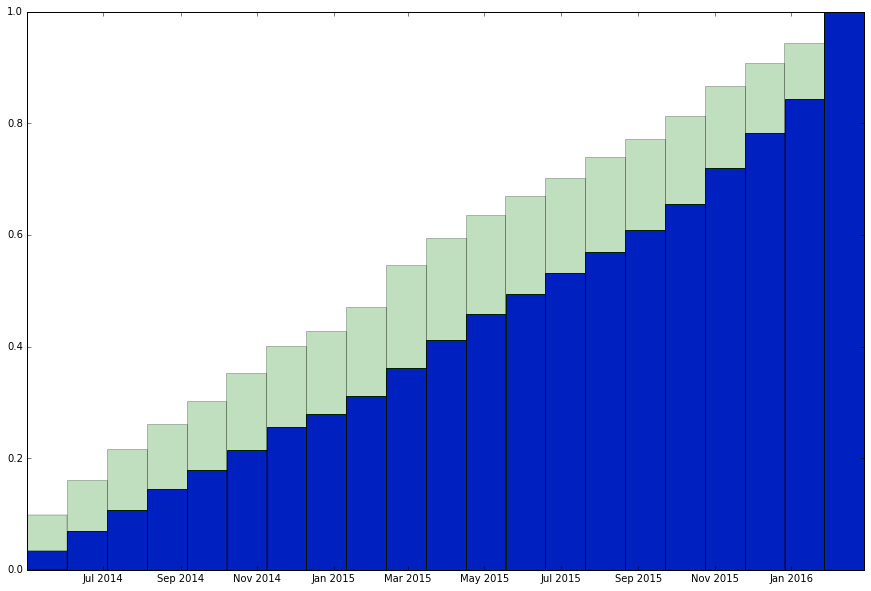

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.hist( df["lastSeen"].tolist() , cumulative=True, normed=True, bins=21, alpha=1.0)
plt.hist( df["firstSeen"].tolist() , cumulative=True, normed=True, bins=21, alpha=0.25)

### Cohort Analysis

In [153]:
query_request = bigquery_service.jobs()
query_data = {
    'query': (
        '''
SELECT
  firstSeen,
  lastSeen,
  COUNT(*) AS cnt FROM (
  SELECT
    requesterId,
    STRING(YEAR(MIN(firstSeen))) + '-' + RIGHT('0' + STRING(MONTH(MIN(firstSeen))), 2) AS firstSeen,
    STRING(YEAR(MAX(lastSeen))) + '-' + RIGHT('0' + STRING(MONTH(MAX(lastSeen))), 2) AS lastSeen,
    COUNT(groupId) AS HITgroupsPosted
  FROM
    entities.HITgroup
  GROUP BY
    requesterId)
GROUP BY
  firstSeen,
  lastSeen
ORDER BY
  firstSeen,
  lastSeen
        ''')
}

query_response = query_request.query(
            projectId='crowd-power',
            body=query_data).execute()

# Put the SQL results in a Pandas Dataframe
import pandas as pd
columns = [f.get('name') for f in query_response['schema']['fields']]
rows = [tuple([row['f'][i]['v'] for i in range(len(row['f']))]) for row in query_response['rows']]
df = pd.DataFrame(data=rows, columns=columns, dtype=int)

# Transform the dataframe into a pivot table
pivot = pd.pivot_table(df, values='cnt', index=['lastSeen'], columns=['firstSeen'])


In [154]:
# We will do a set of transformations here, to create a pivotTable
# with each column containing a cohort of users, and each row
# showing how many requesters from that cohort are still active
# (active means that they have posted a HIT on that month or later)
import numpy as np

# The cumulative sum creates columns that have the "opposite" order
# than what we want
pc = pivot.cumsum()
# Ideally, I would like to "reverse" the columns ignoring NaNs
# but I cannot figure out an easy way to do so. So, I revert 
# to a set of for loops. The 
pc2 = pd.DataFrame(pivot)
for c in pc.columns.values:
    pc2[c] = np.amax(pc,axis=0)[c] - pc[c].shift() 
for c in pc.columns.values:
    pc2.at[c,c] = np.amax(pc,axis=0)[c]

pc2

firstSeen,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,...,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02
lastSeen,,,,,,,,,,,,,,,,,,,,,
2014-05,2677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06,1795,1592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07,1540,933,1512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,1432,742,804,1301,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09,1339,677,605,619,1076,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10,1271,630,536,468,515,1227,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11,1227,598,492,424,382,605,1342,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12,1168,573,468,393,348,442,581,855,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01,1133,557,447,369,325,400,431,394,987,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


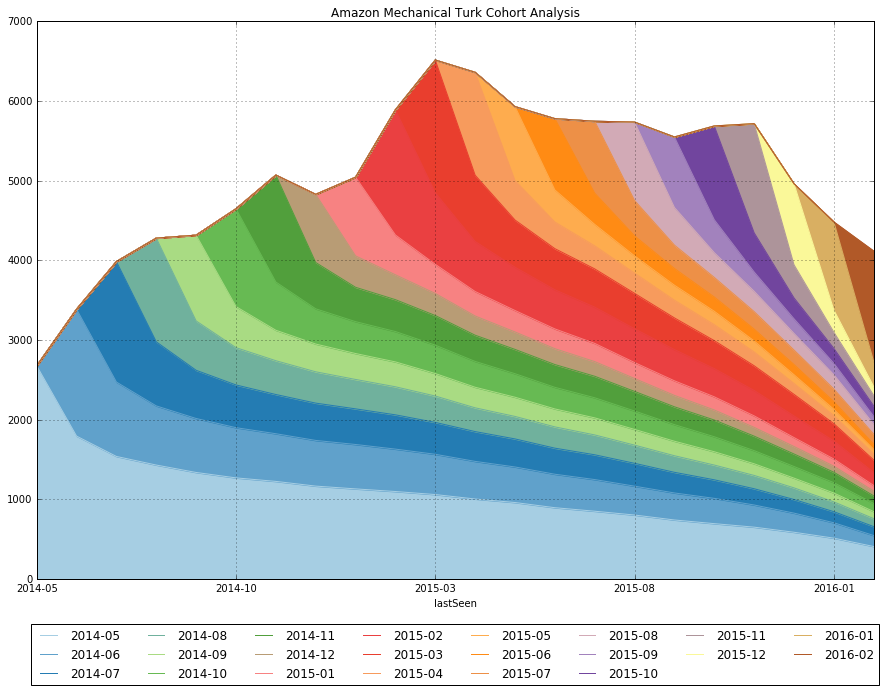

In [155]:
f = plt.figure()
pc2.plot(kind='area', stacked=True, legend=True, figsize=(15,10), cmap='Paired', grid=True, ax=f.gca());
plt.title('Amazon Mechanical Turk Cohort Analysis', color='black')
plt.legend(loc='lower center', ncol=8, bbox_to_anchor=[0.5, -0.2])
plt.show()

